In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [25]:
def normalize(data):
    y = pd.to_numeric(data)
    y = np.array(y.reshape(-1, 1))
    
    scaler = MinMaxScaler()
    y = scaler.fit_transform(y)
    y = y.reshape(1, -1)[0]
    return y

def getAllHighCorr(dataset, limit):
    features = dataset.columns
    hc_features = []
    for w in range(0, len(features)):
        #print('Highly correlated with ' + w)
        col_name = features[w]
        col = dataset[col_name]
        temp = col[((col <= -limit) | (col >= limit))]
        hc_features.append(temp)
        #print(col[col>=0.5])
        #print('\n')
        
        
    for w in range(1, len(features)-1):
        hc_features[w] = hc_features[w].to_frame()
        print(hc_features[w])
        print('\n')
        
    return hc_features


def importDFOfRoad(roadIndex):
    ROAD = ROADS_1[roadIndex]
    TRAFFIC_WINDOWSIZE = 1
    TRAFFIC_FILENAME = "mmda_" + ROAD + "_" + YEAR +  "_transformed"
    traffic_raw_data = pd.read_csv(DATASET_DIR + "mmda/2015/transformed/" + TRAFFIC_FILENAME + EXT, skipinitialspace=True)
    traffic_raw_data = traffic_raw_data.fillna(0)
    traffic_dataset = traffic_raw_data

    cols_to_remove =  [0, 1, 2]

    traffic_dataset.drop(traffic_raw_data.columns[[cols_to_remove]], axis=1, inplace=True)
    return traffic_dataset

def trafficWeatherCorr(traffic, weather, rWindow=1):
    d1 = traffic.rolling(rWindow).mean()
    d2 = weather.rolling(rWindow).mean()
    df = pd.merge(d1, d2, left_index=True, right_index=True)
    corr = df.corr(method='spearman')
    
    return corr

def oneDatasetCorr(df):
    corr = df.corr(method='spearman')
    return corr

def visualizeCorrelationPlot(dc):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(dc, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(dc.columns),1)
    ax.set_yticks(ticks)
    ticks = np.arange(0,len(dc.columns),1)
    ax.set_xticks(ticks)
    ax.set_yticklabels(dc.columns)
    plt.show()


## Importing Datasets

In [26]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

ROAD = "Taft Ave."
YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/"
DATASET_DIVISION = "transformed"

#### Traffic Dataset

In [32]:
TRAFFIC_LIST = []
for t in ROADS_1:
    ROAD = t
    TRAFFIC_FILENAME = "raw_mmda_" + ROAD + "_" + YEAR +  "_" + DATASET_DIVISION
    try:
        traffic_raw_data = pd.read_csv(DATASET_DIR + "mmda-wwo/raw/2015/" +  DATASET_DIVISION + "/mmda/" + TRAFFIC_FILENAME + EXT, skipinitialspace=True)
    except FileNotFoundError: 
        print("File not found... file: " + TRAFFIC_FILENAME)
        continue
    
    traffic_raw_data = traffic_raw_data.fillna(0)
    traffic_dataset = traffic_raw_data
    
    if DATASET_DIVISION == "transformed":
        cols_to_remove = [0, 1, 2]
    else:
        cols_to_remove =  [0, 1]
        

    traffic_dataset.drop(traffic_raw_data.columns[[cols_to_remove]], axis=1, inplace=True)
    TRAFFIC_LIST.append(traffic_dataset)
    
    print("File adding to array... file: " + TRAFFIC_FILENAME)

File adding to array... file: raw_mmda_A. Maceda_2015_transformed
File adding to array... file: raw_mmda_Anda Circle_2015_transformed
File adding to array... file: raw_mmda_Antipolo_2015_transformed
File adding to array... file: raw_mmda_Bluementritt_2015_transformed
File adding to array... file: raw_mmda_Buendia_2015_transformed
File adding to array... file: raw_mmda_Edsa Extension_2015_transformed
File adding to array... file: raw_mmda_Finance Road_2015_transformed
File adding to array... file: raw_mmda_Gov. Forbes - Lacson_2015_transformed
File adding to array... file: raw_mmda_Lerma_2015_transformed
File adding to array... file: raw_mmda_Magsaysay Ave_2015_transformed
File adding to array... file: raw_mmda_P.Noval_2015_transformed
File adding to array... file: raw_mmda_Pablo Ocampo_2015_transformed
File adding to array... file: raw_mmda_Pedro Gil_2015_transformed
File adding to array... file: raw_mmda_Quezon Ave._2015_transformed
File adding to array... file: raw_mmda_Quirino_2015_

#### Weather Dataset

In [33]:
WEATHER_WINDOWSIZE = 2
if DATASET_DIVISION == "transformed":
    WEATHER_FILENAME = "raw_wwo_" + YEAR
else:
    WEATHER_FILENAME = "raw_wwo_" + YEAR + "_" + DATASET_DIVISION
weather_dataset = pd.read_csv(DATASET_DIR + "mmda-wwo/raw/2015/" +  DATASET_DIVISION + "/wwo/" + WEATHER_FILENAME + EXT, skipinitialspace=True)
weather_dataset = weather_dataset.fillna(0)

if DATASET_DIVISION == "transformed":
    cols_to_remove = [0]
else:
    cols_to_remove = [0, 1] #removes date and time
weather_dataset = weather_dataset.drop(weather_dataset.columns[[cols_to_remove]], axis=1)

weather_dataset.head()

,tempC,windspeedMiles,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustMiles,feelsLikeC
0,25.00,9.0,0.0,84.0,10.0,1012.0,33.0,27.0,22.0,25.00,11.00,27.0
1,24.75,9.0,0.0,84.0,10.0,1012.0,32.5,27.0,22.0,24.75,11.25,27.0
2,24.50,9.0,0.0,84.0,10.0,1012.0,32.0,27.0,22.0,24.50,11.50,27.0
3,24.25,9.0,0.0,84.0,10.0,1012.0,31.5,27.0,22.0,24.25,11.75,27.0
4,24.00,9.0,0.0,84.0,10.0,1012.0,31.0,27.0,22.0,24.00,12.00,27.0


#### Visualize Traffic (Original vs Rolling Mean)

Traffic for A. Maceda


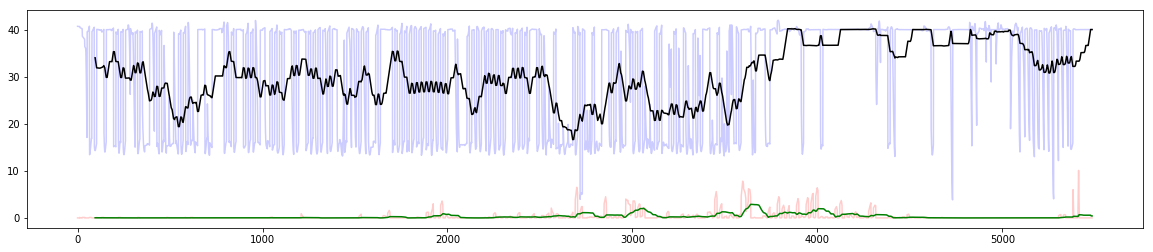

Corr for A. Maceda
statusN          -0.057744
statusS           1.000000
tempC            -0.145215
windspeedMiles   -0.223951
precipMM         -0.029023
humidity          0.238841
visibility        0.102587
pressure          0.120599
cloudcover        0.046539
heatIndexC       -0.047839
dewPointC         0.140054
windChillC       -0.145689
windGustMiles    -0.228452
feelsLikeC       -0.047839
Name: statusS, dtype: float64
Traffic for Anda Circle


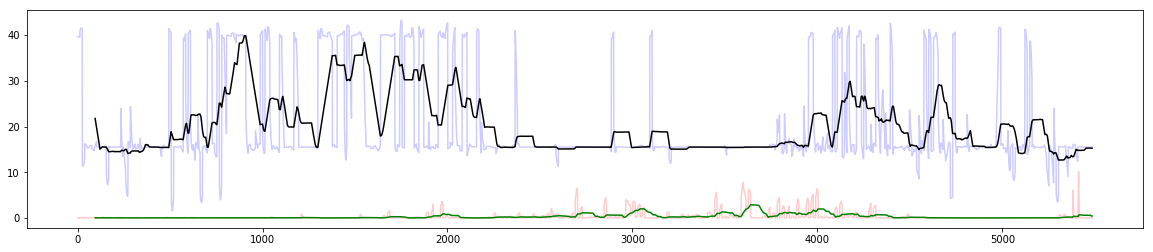

Corr for Anda Circle
statusN           0.545764
statusS           1.000000
tempC             0.026032
windspeedMiles   -0.040569
precipMM         -0.057050
humidity         -0.096770
visibility        0.091374
pressure          0.073720
cloudcover       -0.017495
heatIndexC       -0.010735
dewPointC        -0.096489
windChillC        0.026265
windGustMiles    -0.048993
feelsLikeC       -0.010735
Name: statusS, dtype: float64
Traffic for Antipolo


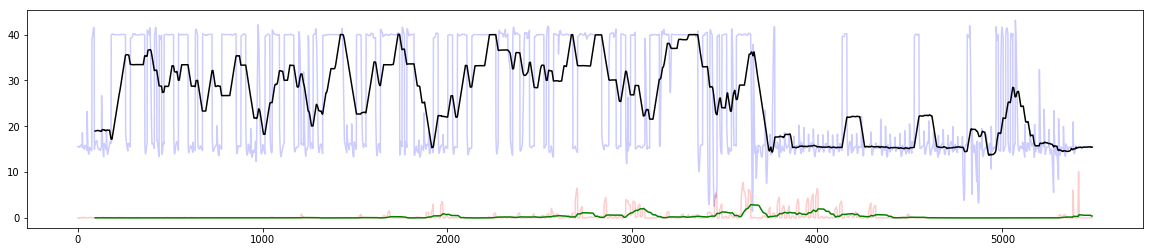

Corr for Antipolo
statusN           0.326254
statusS           1.000000
tempC             0.103344
windspeedMiles    0.098534
precipMM         -0.018532
humidity         -0.220156
visibility        0.000685
pressure         -0.107786
cloudcover       -0.069805
heatIndexC        0.018896
dewPointC        -0.159223
windChillC        0.103600
windGustMiles     0.092685
feelsLikeC        0.018896
Name: statusS, dtype: float64
Traffic for Bluementritt


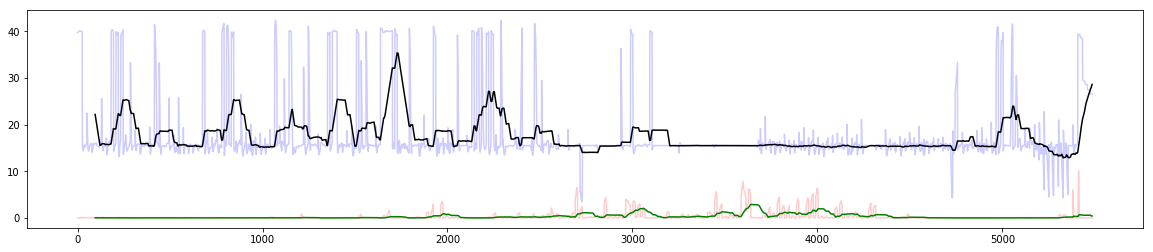

Corr for Bluementritt
statusN           0.206928
statusS           1.000000
tempC            -0.048261
windspeedMiles   -0.017827
precipMM         -0.026680
humidity          0.018870
visibility        0.005587
pressure          0.057506
cloudcover       -0.072532
heatIndexC       -0.057217
dewPointC        -0.050466
windChillC       -0.048540
windGustMiles    -0.005917
feelsLikeC       -0.057217
Name: statusS, dtype: float64
Traffic for Buendia


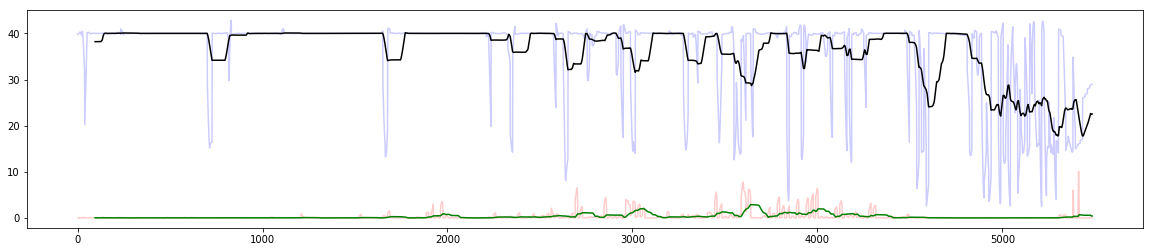

Corr for Buendia
statusN           0.097894
statusS           1.000000
tempC             0.073364
windspeedMiles   -0.050558
precipMM         -0.088755
humidity         -0.094618
visibility        0.011699
pressure          0.044596
cloudcover       -0.018327
heatIndexC        0.037345
dewPointC        -0.044593
windChillC        0.073894
windGustMiles    -0.053645
feelsLikeC        0.037345
Name: statusS, dtype: float64
Traffic for Edsa Extension


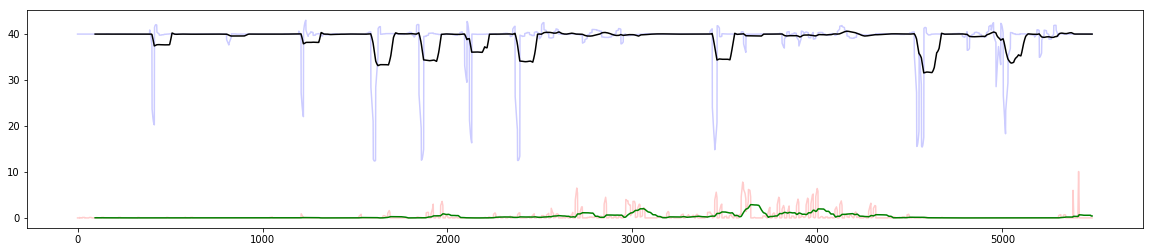

Corr for Edsa Extension
statusN           0.181738
statusS           1.000000
tempC             0.035350
windspeedMiles   -0.026247
precipMM         -0.013344
humidity         -0.040423
visibility        0.026862
pressure          0.041619
cloudcover       -0.037413
heatIndexC        0.006773
dewPointC        -0.018695
windChillC        0.035788
windGustMiles    -0.041954
feelsLikeC        0.006773
Name: statusS, dtype: float64
Traffic for Finance Road


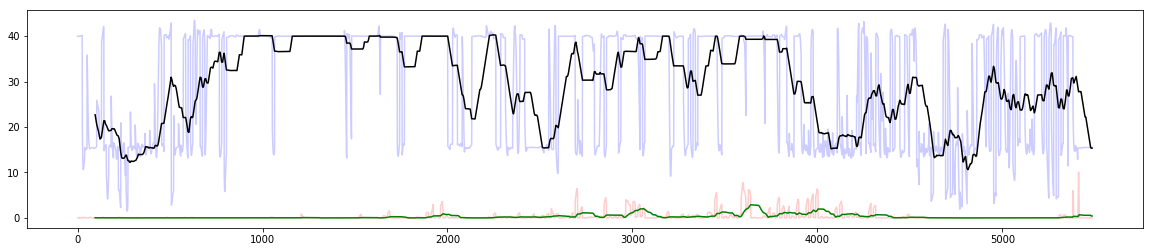

Corr for Finance Road
statusN           0.350152
statusS           1.000000
tempC             0.101772
windspeedMiles   -0.071107
precipMM         -0.094171
humidity         -0.148279
visibility        0.067628
pressure          0.017204
cloudcover        0.048625
heatIndexC        0.049283
dewPointC        -0.069542
windChillC        0.101442
windGustMiles    -0.073289
feelsLikeC        0.049283
Name: statusS, dtype: float64
Traffic for Gov. Forbes - Lacson


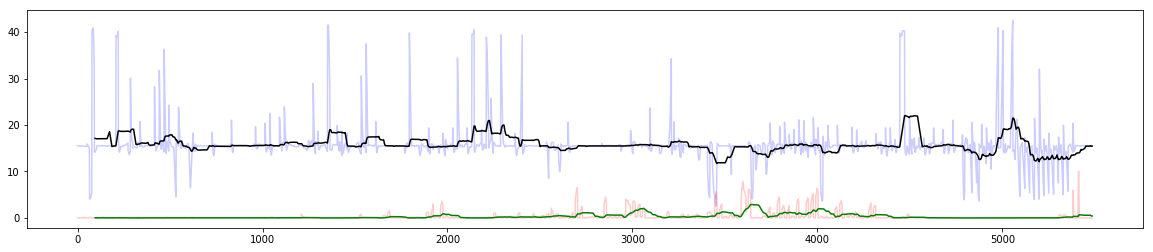

Corr for Gov. Forbes - Lacson
statusN           0.227828
statusS           1.000000
tempC            -0.070246
windspeedMiles    0.012894
precipMM         -0.011150
humidity          0.041064
visibility       -0.059996
pressure          0.022431
cloudcover       -0.053382
heatIndexC       -0.064018
dewPointC        -0.034927
windChillC       -0.069770
windGustMiles     0.033006
feelsLikeC       -0.064018
Name: statusS, dtype: float64
Traffic for Lerma


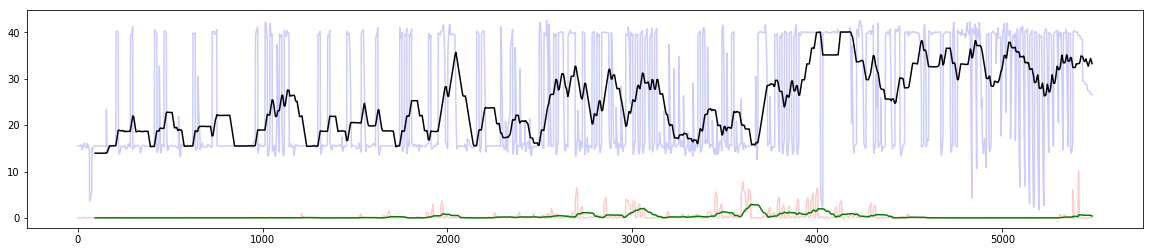

Corr for Lerma
statusN           0.037796
statusS           1.000000
tempC            -0.030946
windspeedMiles   -0.215149
precipMM         -0.020183
humidity          0.177805
visibility        0.098738
pressure         -0.062981
cloudcover        0.081223
heatIndexC        0.058368
dewPointC         0.196363
windChillC       -0.031081
windGustMiles    -0.222375
feelsLikeC        0.058368
Name: statusS, dtype: float64
Traffic for Magsaysay Ave


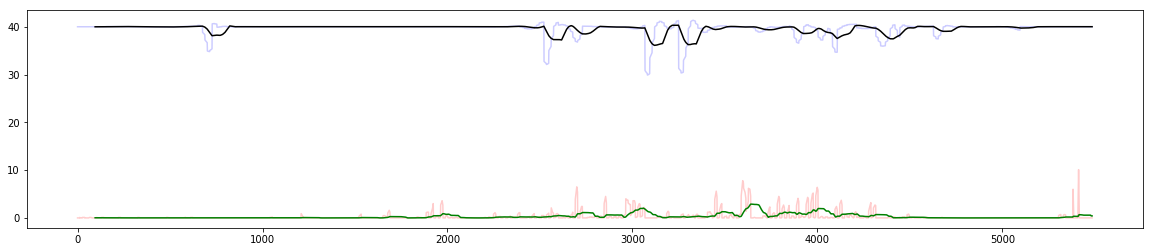

Corr for Magsaysay Ave
statusN           0.097901
statusS           1.000000
tempC            -0.008616
windspeedMiles    0.081075
precipMM         -0.022032
humidity         -0.149701
visibility        0.074752
pressure          0.096647
cloudcover        0.015210
heatIndexC       -0.103888
dewPointC        -0.223750
windChillC       -0.007099
windGustMiles     0.059538
feelsLikeC       -0.103888
Name: statusS, dtype: float64
Traffic for P.Noval


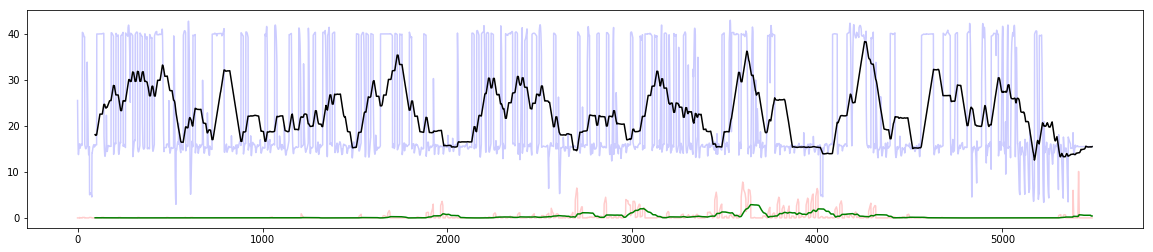

Corr for P.Noval
statusN           0.173882
statusS           1.000000
tempC            -0.046455
windspeedMiles   -0.110103
precipMM         -0.070670
humidity          0.027812
visibility        0.050994
pressure          0.042385
cloudcover        0.009923
heatIndexC       -0.026991
dewPointC        -0.009359
windChillC       -0.045252
windGustMiles    -0.119411
feelsLikeC       -0.026991
Name: statusS, dtype: float64
Traffic for Pablo Ocampo


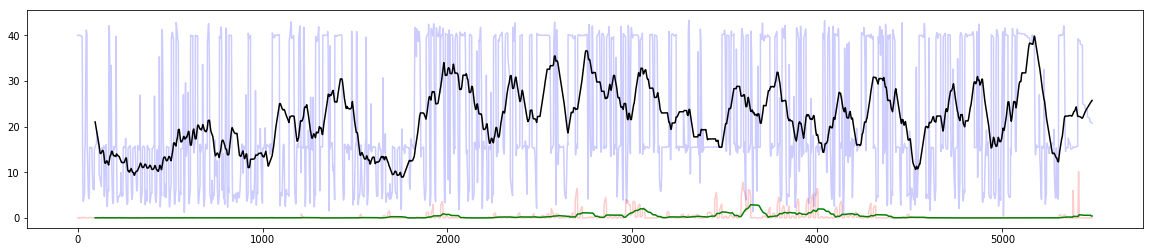

Corr for Pablo Ocampo
statusN           0.222422
statusS           1.000000
tempC             0.112456
windspeedMiles   -0.024906
precipMM          0.099971
humidity          0.047863
visibility       -0.119677
pressure         -0.213675
cloudcover        0.023384
heatIndexC        0.140468
dewPointC         0.170779
windChillC        0.111401
windGustMiles    -0.006321
feelsLikeC        0.140468
Name: statusS, dtype: float64
Traffic for Pedro Gil


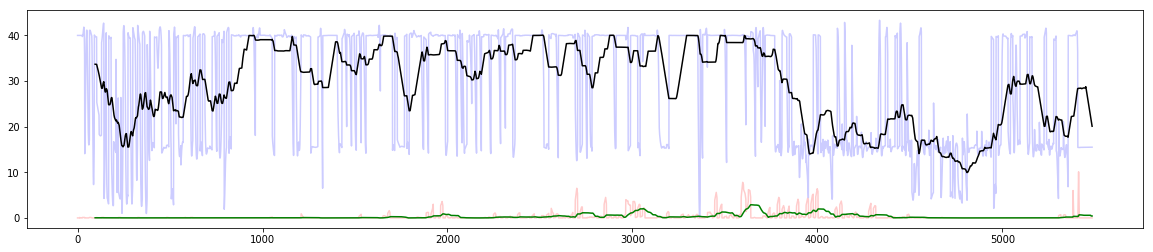

Corr for Pedro Gil
statusN           0.502502
statusS           1.000000
tempC             0.240402
windspeedMiles   -0.127462
precipMM         -0.013141
humidity         -0.200223
visibility       -0.011518
pressure         -0.117035
cloudcover       -0.032249
heatIndexC        0.208224
dewPointC         0.036095
windChillC        0.240459
windGustMiles    -0.133484
feelsLikeC        0.208224
Name: statusS, dtype: float64
Traffic for Quezon Ave.


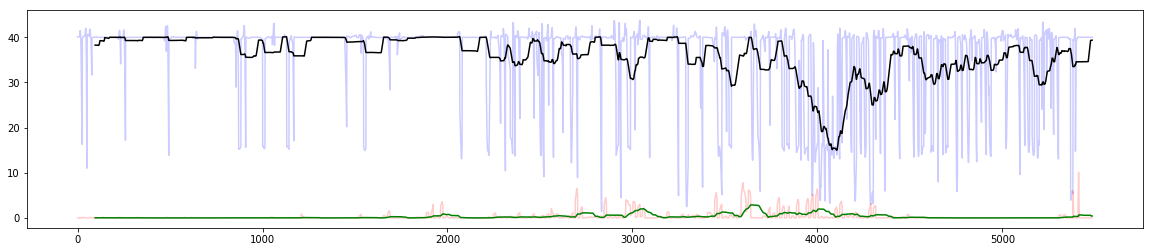

Corr for Quezon Ave.
statusN           0.101643
statusS           1.000000
tempC            -0.008464
windspeedMiles    0.049201
precipMM         -0.070534
humidity         -0.098504
visibility        0.056723
pressure          0.061226
cloudcover        0.053573
heatIndexC       -0.050581
dewPointC        -0.133811
windChillC       -0.008998
windGustMiles     0.031314
feelsLikeC       -0.050581
Name: statusS, dtype: float64
Traffic for Quirino


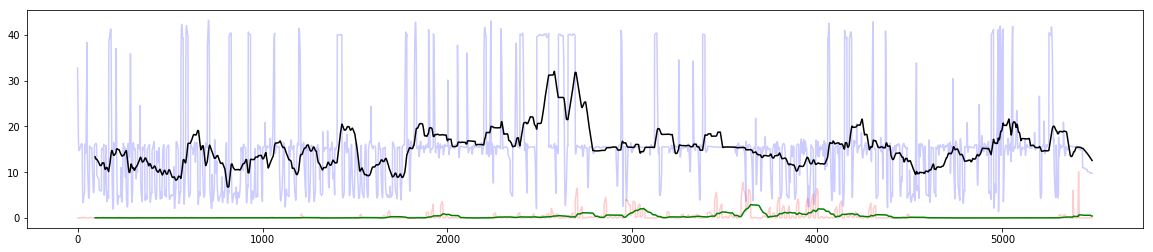

Corr for Quirino
statusN           0.341634
statusS           1.000000
tempC             0.192801
windspeedMiles    0.053246
precipMM          0.187954
humidity         -0.068281
visibility       -0.125374
pressure         -0.260622
cloudcover       -0.018269
heatIndexC        0.194187
dewPointC         0.124845
windChillC        0.193799
windGustMiles     0.076576
feelsLikeC        0.194187
Name: statusS, dtype: float64
Traffic for Rajah Sulayman


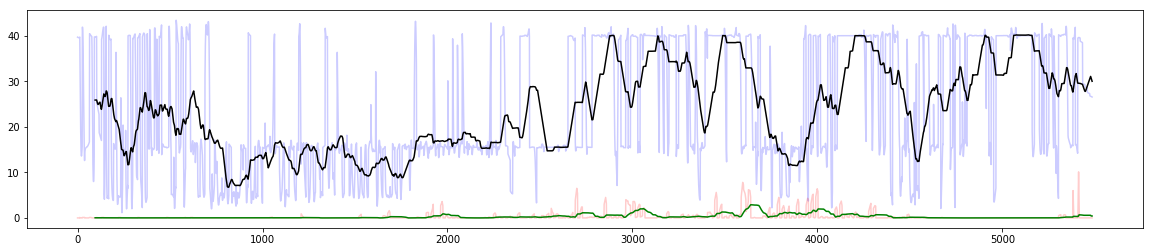

Corr for Rajah Sulayman
statusN           0.572512
statusS           1.000000
tempC            -0.062454
windspeedMiles   -0.012003
precipMM          0.115766
humidity          0.228065
visibility       -0.091201
pressure         -0.180624
cloudcover        0.132821
heatIndexC        0.039318
dewPointC         0.207739
windChillC       -0.062465
windGustMiles    -0.001555
feelsLikeC        0.039318
Name: statusS, dtype: float64
Traffic for Taft Ave.


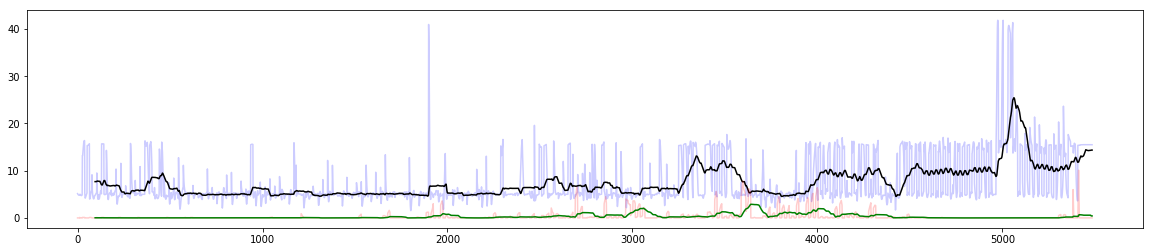

Corr for Taft Ave.
statusN           0.025834
statusS           1.000000
tempC            -0.076559
windspeedMiles   -0.085218
precipMM         -0.000531
humidity          0.098633
visibility        0.057296
pressure          0.012329
cloudcover        0.029685
heatIndexC       -0.037475
dewPointC         0.040479
windChillC       -0.076707
windGustMiles    -0.095540
feelsLikeC       -0.037475
Name: statusS, dtype: float64
Traffic for U.N. Avenue


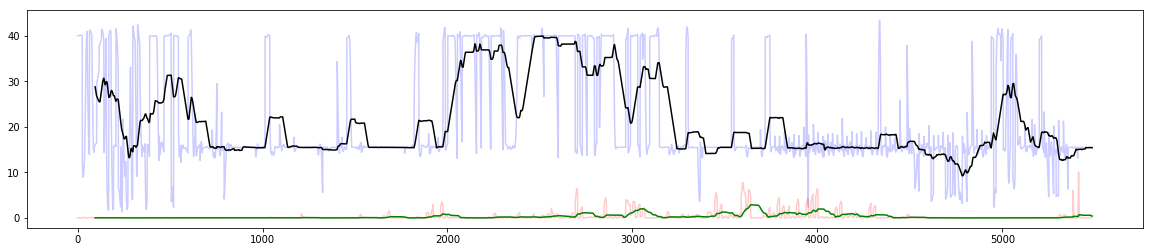

Corr for U.N. Avenue
statusN           0.433565
statusS           1.000000
tempC             0.176631
windspeedMiles   -0.030830
precipMM          0.119711
humidity         -0.152745
visibility       -0.054389
pressure         -0.143626
cloudcover        0.000944
heatIndexC        0.141610
dewPointC         0.003599
windChillC        0.177067
windGustMiles    -0.026433
feelsLikeC        0.141610
Name: statusS, dtype: float64
Traffic for Vicente Cruz


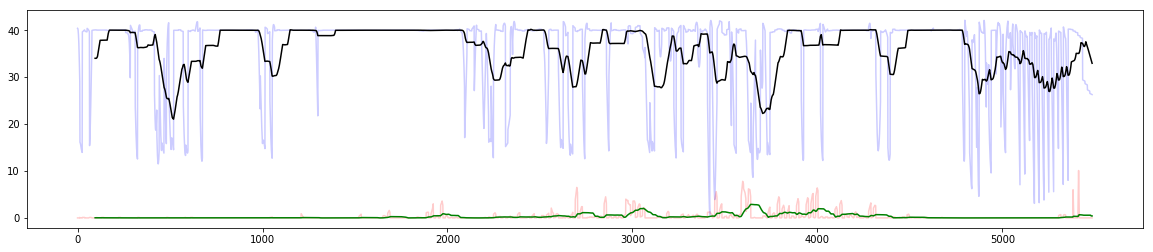

Corr for Vicente Cruz
statusN           0.070512
statusS           1.000000
tempC             0.029183
windspeedMiles   -0.016045
precipMM          0.070734
humidity         -0.009098
visibility       -0.090265
pressure         -0.063417
cloudcover        0.028080
heatIndexC        0.027727
dewPointC         0.025141
windChillC        0.029950
windGustMiles    -0.009440
feelsLikeC        0.027727
Name: statusS, dtype: float64


In [121]:
startMonth = RAINY[0]
endMonth = RAINY[1]
ROAD_INDEX = 6

for r in range(len(ROADS_1)):

    td = TRAFFIC_LIST[r]
    wd = weather_dataset

    print("Traffic for " + ROADS_1[r])
    
    plt.figure(figsize=(20, 4))
    xaxis = range(9, 12)

    plt.plot(td.statusS, alpha=0.2, c='b')
    plt.plot(td.statusS.rolling(96).mean(), c='black')

    plt.plot(wd.precipMM, alpha=0.2,c='r')
    plt.plot(wd.precipMM.rolling(96).mean(), c='green')
    plt.show()

    traffic = td
    weather = wd
    corr = trafficWeatherCorr(traffic, weather)
    
    print("Corr for " + ROADS_1[r])
    print(corr['statusS'])
    print("================")

## Correlate

### Rainy Season (Weather x Traffic) Correlation

A. Maceda


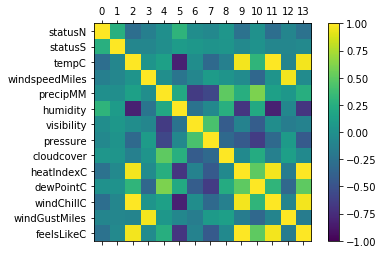

Anda Circle


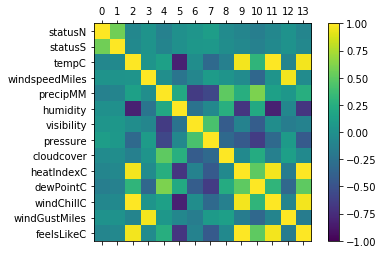

Antipolo


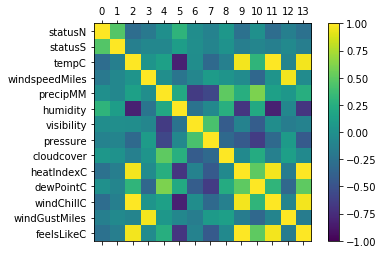

Bluementritt


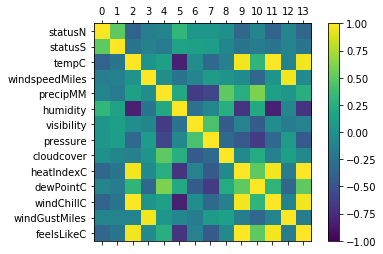

Buendia


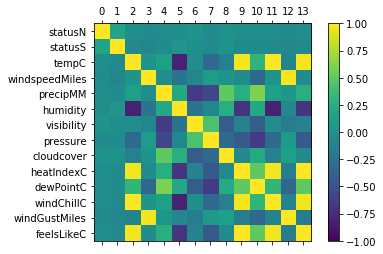

Edsa Extension


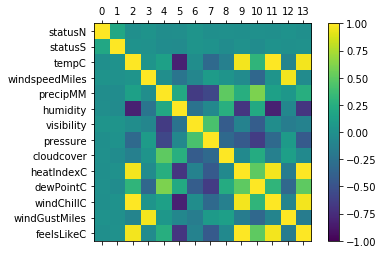

Finance Road


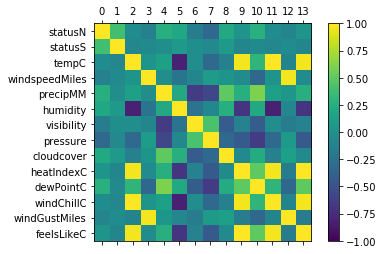

Gov. Forbes - Lacson


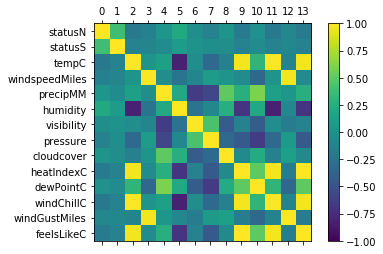

Lerma


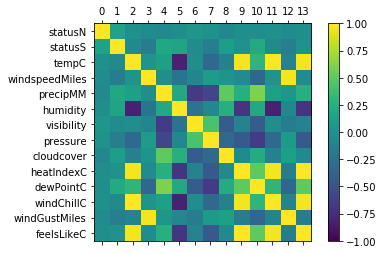

Magsaysay Ave


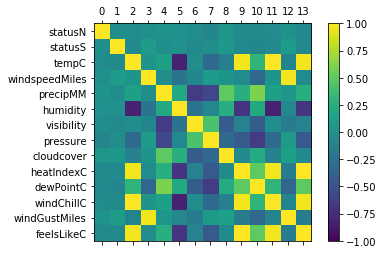

P.Noval


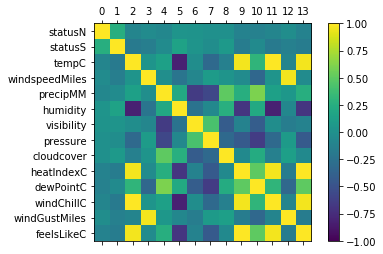

Pablo Ocampo


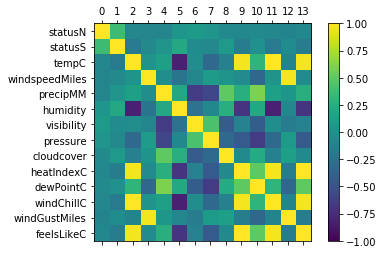

Pedro Gil


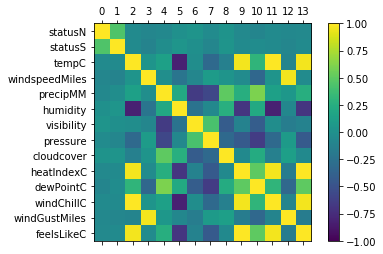

Quezon Ave.


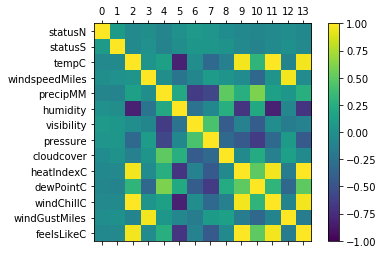

Quirino


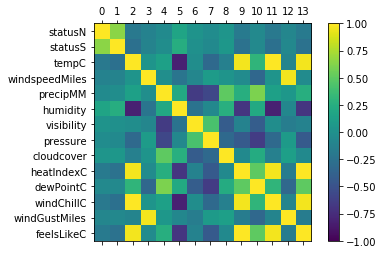

Rajah Sulayman


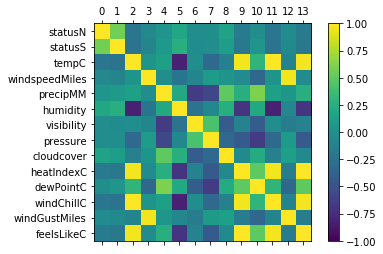

Taft Ave.


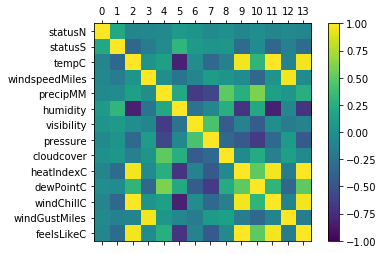

U.N. Avenue


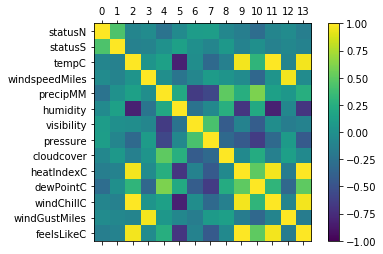

Vicente Cruz


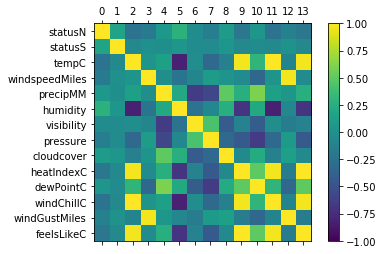

In [35]:
if not os.path.exists(DATASET_DIR + "analysis/" + DATASET_DIVISION):
        os.makedirs(DATASET_DIR + "analysis/" + DATASET_DIVISION)

TO_EXPORT = True
for r in range(len(TRAFFIC_LIST)):
    traffic = TRAFFIC_LIST[r]
    weather = weather_dataset
    rainy_corr = trafficWeatherCorr(traffic, weather)
    
    if TO_EXPORT:
        rainy_corr.to_csv(DATASET_DIR + "analysis/" + DATASET_DIVISION + "/" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT, encoding='utf-8')
        
    print(ROADS_1[r])
    visualizeCorrelationPlot(rainy_corr)

### Rolling Mean (Weather x Traffic) Correlation

In [36]:
def renameRollingColumns(original, dataset, w):
    temp_mean = original.rolling(w).mean().fillna(0)
    for c in original.columns:
        temp_mean = temp_mean.rename(columns={c:c + "_Rmean=" + str(w)})
    
    temp_min = original.rolling(w).min().fillna(0)
    for c in original.columns:
        temp_min = temp_min.rename(columns={c:c + "_Rmin=" + str(w)})
    
    temp_max = original.rolling(w).max().fillna(0)
    for c in original.columns:
        temp_max = temp_max.rename(columns={c:c + "_Rmax=" + str(w)})

    return pd.concat([dataset, temp_mean, temp_min, temp_max], axis=1)

In [37]:
TO_EXPORT = True
WINDOWS = [2,3,4,8,12,24,32,48,96]
if not os.path.exists(DATASET_DIR + "analysis/rolling_" + DATASET_DIVISION + "/"):
        os.makedirs(DATASET_DIR + "analysis/rolling_" + DATASET_DIVISION + "/")

# for r in range(len(TRAFFIC_LIST)):
for r in range(len(TRAFFIC_LIST)):

    print("Engineering for road " + ROADS_1[r])
    traffic = TRAFFIC_LIST[r]
    weather = weather_dataset

    for w in WINDOWS:
        traffic = renameRollingColumns(TRAFFIC_LIST[r], traffic, w)
        weather = renameRollingColumns(weather_dataset, weather, w)
        print(">>>> Engineered features for window " + str(w))

    print(">> Correlating " + ROADS_1[r])
    rainy_corr = trafficWeatherCorr(traffic, weather)
    if TO_EXPORT:
        rainy_corr.to_csv(DATASET_DIR + "analysis/rolling_" + DATASET_DIVISION + "/rolling-" 
                          + DATASET_DIVISION + "_" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                          encoding='utf-8')
        print(">> Exported file: " + ROADS_1[r])
    print(">> Done.")

Engineering for road A. Maceda
>>>> Engineered features for window 2
>>>> Engineered features for window 3
>>>> Engineered features for window 4
>>>> Engineered features for window 8
>>>> Engineered features for window 12
>>>> Engineered features for window 24
>>>> Engineered features for window 32
>>>> Engineered features for window 48
>>>> Engineered features for window 96
>> Correlating A. Maceda
>> Exported file: A. Maceda
>> Done.
Engineering for road Anda Circle
>>>> Engineered features for window 2
>>>> Engineered features for window 3
>>>> Engineered features for window 4
>>>> Engineered features for window 8
>>>> Engineered features for window 12
>>>> Engineered features for window 24
>>>> Engineered features for window 32
>>>> Engineered features for window 48
>>>> Engineered features for window 96
>> Correlating Anda Circle
>> Exported file: Anda Circle
>> Done.
Engineering for road Antipolo
>>>> Engineered features for window 2
>>>> Engineered features for window 3
>>>> Eng

>>>> Engineered features for window 12
>>>> Engineered features for window 24
>>>> Engineered features for window 32
>>>> Engineered features for window 48
>>>> Engineered features for window 96
>> Correlating Vicente Cruz
>> Exported file: Vicente Cruz
>> Done.


### Auto Correlation
<b>I have no idea kung tama ginagawa ko :D  -Dyan</b>

In [ ]:
traffic_dataset.iloc[0].autocorr(lag=100)

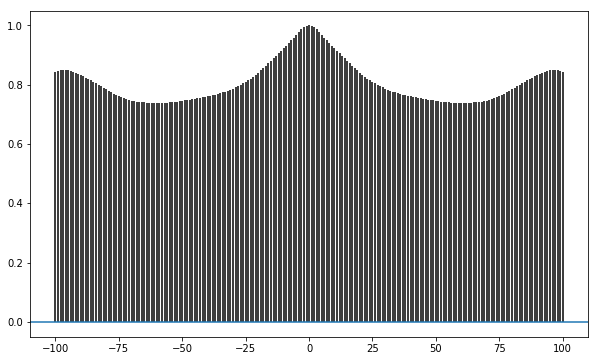

In [40]:
#Auto Correlation of statusS
plt.figure(figsize=(10, 6))
#plt.acorr(traffic_dataset.iloc[23330:24002,:].statusS, maxlags=97)
plt.acorr(traffic_dataset.statusN, maxlags=100)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(traffic_dataset.iloc[23330:24002,:].statusS);
plt.show()